# Factors on which loan approval is dependent 

## Investigation Overview

In this investigation, I am going  to look at the factors or features that could help the loan applicant to get the approval status.
The main focus was on the some of the variables like:

**As I'm going to help people to get their loan approved.**

1.Term  

2.LoanStatus 

3.BorrowerRate 

4.ProsperScore 

5.EmploymentStatus

6.Occupation

7.BorrowerHomeowner 

8.StatedMonthlyIncome 

9.Recommendations

10.LoanOriginalAmount

11.IncomeRange

### Load packages

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks

%matplotlib inline

### Read the data

In [2]:
loan_df = pd.read_csv('load_data.csv')

loan_df.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating_Numeric,ProsperRating_Alpha,ProsperScore,ListingCategory_Numeric,EmploymentStatus,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
0,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,2,Employed,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
1,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,16,Employed,...,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA
2,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,2,Employed,...,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20,MN
3,60,Current,0.11567,0.15425,0.1314,5.0,B,10.0,1,Employed,...,True,8333.333333,342.37,0,0.36,15000,1.0,"$100,000+",1,NM
4,36,Current,0.23820,0.31032,0.2712,2.0,E,2.0,1,Employed,...,True,2083.333333,122.67,0,0.27,3000,1.0,"$25,000-49,999",1,KS


In [5]:
# Due to many variables in this dataset, I only use few variables. Those are:  
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [6]:
loan_df.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating_Numeric', 'ProsperRating_Alpha',
       'ProsperScore', 'ListingCategory_Numeric', 'EmploymentStatus',
       'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState'],
      dtype='object')

## What is the  reason listed by the major people when they take loan?

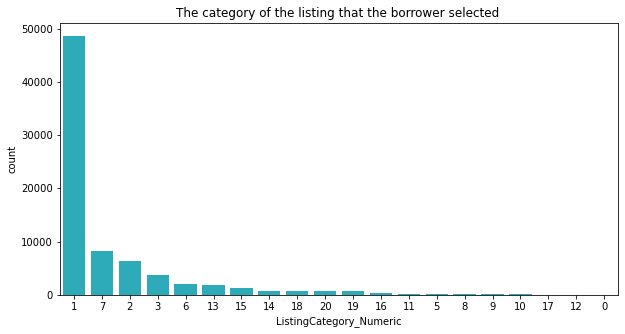

In [38]:
# ListingCategory_Numeric
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[9]
plt.title("The category of the listing that the borrower selected ")
sb.countplot(data = loan_df, x = 'ListingCategory_Numeric', color = base_color,
             order = loan_df['ListingCategory_Numeric'].value_counts().index );



**ListingCategory:** (Nominal Variable)

* The category of the listing that the borrower selected when posting their listing: 

    
0.  Not Available. 1.  Debt Consolidation. 2.  Home Improvement. 3.  Business. 4.  Personal Loan. 5.  Student Use
6.  Auto. 7.  Other. 8.  Baby-Adoption. 9.  Boat. 10. Cosmetic Procedure. 11. Engagement Ring. 12. Green Loans
13. Household Expenses. 14. Large Purchases. 15. Medical/Dental. 16. Motorcycle. 17. RV. 18. Taxes. 19. Vacation
20. Wedding Loans

**Conclusion**

*Major People taking loan due to **Debt Consolidation**.*

#### Identify the type of variables

In [6]:
#Numeric attributes
num_loan_df = loan_df.loc[:, (loan_df.dtypes == np.float64) | (loan_df.dtypes == np.int64)]
num_loan_df.columns

Index(['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric',
       'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'Investors'],
      dtype='object')

In [44]:
#Categorical attributes
cat_loan_df = loan_df.loc[:, (loan_df.dtypes == 'object') | (loan_df.dtypes == 'category') | (loan_df.dtypes == 'bool')]
cat_loan_df.columns


Index(['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IsBorrowerHomeowner', 'IncomeVerifiable', 'IncomeRange',
       'BorrowerState'],
      dtype='object')

In [42]:
# Setting the order of prefrence of ordinal attributes.
# From above it seems the order has to be maintained becuase this is an ordinal variable

ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']

IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']


# check the version of pandas.

pd_ver = pd.__version__.split(".")

if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): 
    # v0.21 or later
    ordinal_classes = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype(ordinal_classes)
    
    ordinal_classes = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(ordinal_classes)


else: # compatibility for v.20
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
   
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

## what is the prosper rating of all the borrowers?

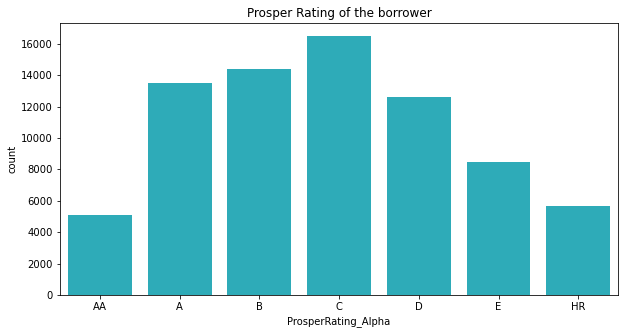

In [43]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[9]
plt.title("Prosper Rating of the borrower")
sb.countplot(data = loan_df, x = 'ProsperRating_Alpha', color = base_color);

**Conclusion**

Majority of borrowers have prosper rating A,B,C,D,E and major are C either C have more chances or
major people  applied for the loan falls under C category. 

 ## Record of Bank when considering loanStatus of all Borrowers?

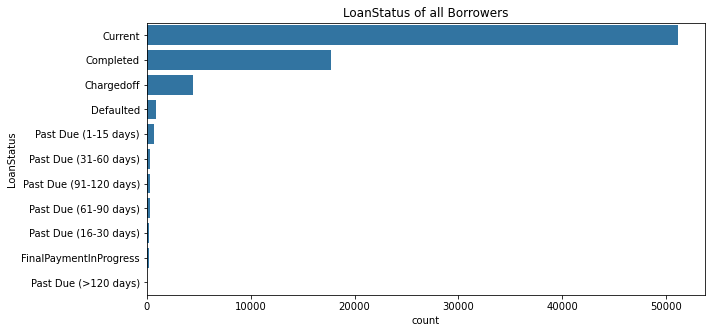

In [13]:
#'LoanStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color,
             order = loan_df['LoanStatus'].value_counts().index);

**Conclusion**

majority of the borrowers are currently in debt.

## Is  Employment Status  matters for Loan Approval?


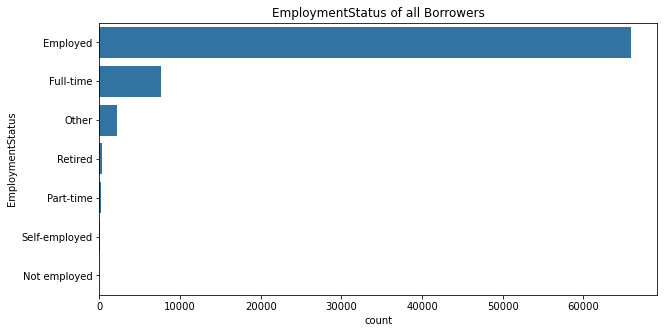

In [14]:
# 'EmploymentStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'EmploymentStatus', color = base_color,
             order = loan_df['EmploymentStatus'].value_counts().index);

**Conclusion**

*yes it matter's a lot majority of the people apply for loan are employed or we can also say that easily get the loan.*

In [11]:
loan_df_1 = loan_df[loan_df['IncomeRange'] != 'Not employed']

 ## What is the income range of borrowers who take loan ?

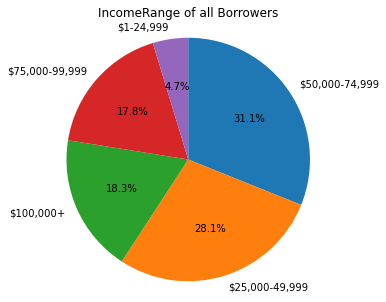

In [13]:
plt.figure(figsize = [10, 5])
sorted_counts = loan_df_1['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct   = '%.1f%%');
plt.title("IncomeRange of all Borrowers")
plt.axis('square');

**Conclusion**

it is better chance of loan approval if your income is in higher then $24,999.

## Monthly Income of All Borrowers

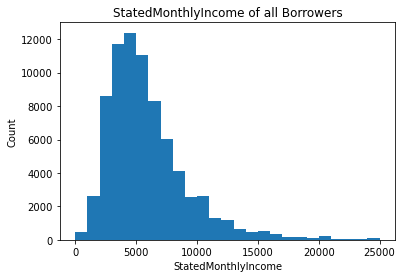

In [24]:


loan_df_sub = loan_df[loan_df['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");
#statement of conclusion is supported by the describe() on next cell which is not added in slide.

In [27]:
#conclusion support
loan_df_sub['StatedMonthlyIncome'].describe()

count    75880.000000
mean      5845.283689
std       3328.110153
min          0.250000
25%       3583.333333
50%       5000.000000
75%       7166.666667
max      25000.000000
Name: StatedMonthlyIncome, dtype: float64

**Conclusion**

Most of the borrowers have monthly income is  **5845**  so it is clear that your incomeRange must be greater then **24.999** to get your loan approved easily.


## what amount of  Loan  Taken By Borrowers from bank ?

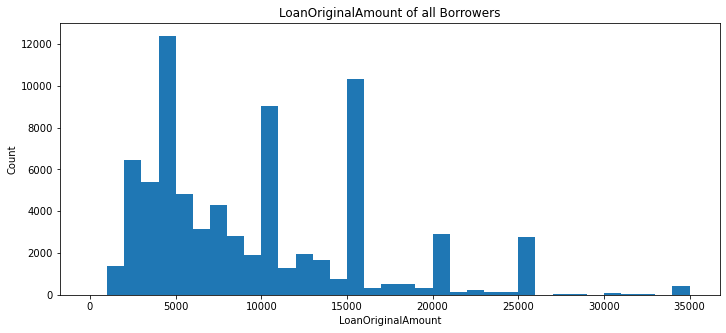

In [33]:
plt.figure(figsize = [26, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =loan_df, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");



**Conclusion**

 Here we see that the distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD. So, people prefer the loan of these peak amount.

##  how many  Investors are avaliable there for all Borrowers?

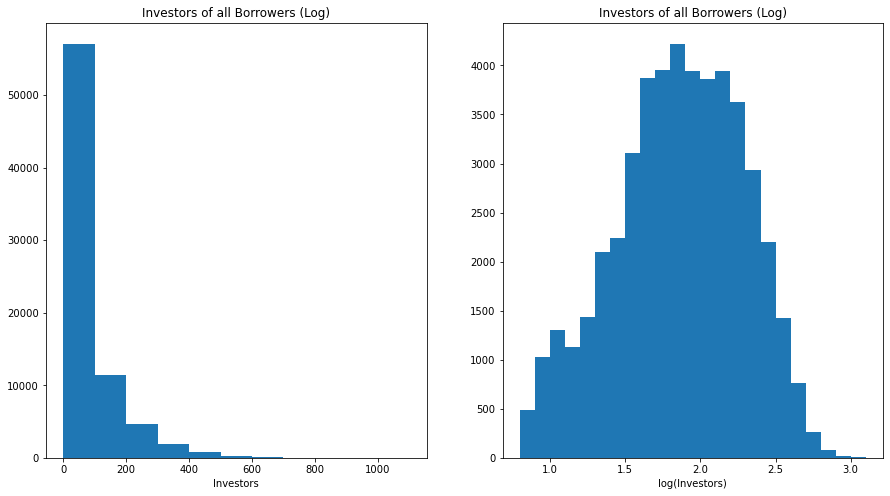

In [22]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['Investors'].max()+10, 100)
plt.hist(data =loan_df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers (Log)");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

loan_df['Investors_log'] = np.log10(loan_df['Investors'])

#### Relationship between two numeric variables

In [29]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors', 'LoanOriginalAmount_log',
                 'Investors_log']

numeric_vars_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors' ,'LoanOriginalAmount_log',
                 'Investors_log']

categoric_vars = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

## Heatmap showing correlation between diffrent feilds

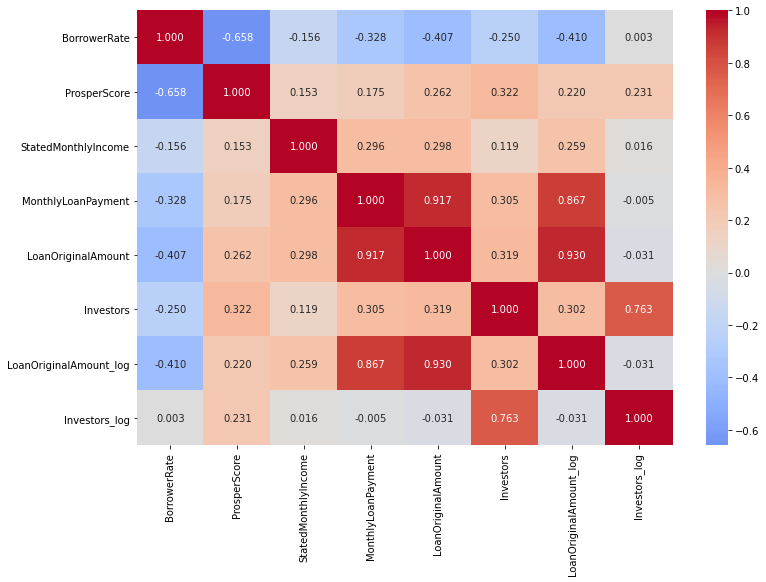

In [27]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_df[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'coolwarm', center = 0)
plt.show()

## Is loan approved by bank  depends upon the income range  of applicant ? 

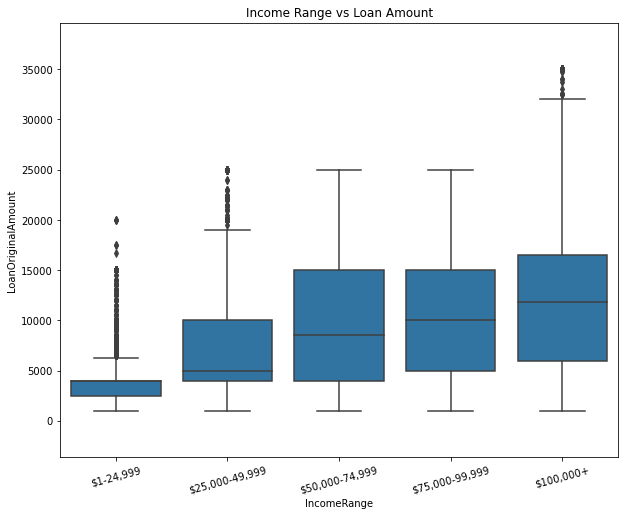

In [46]:
loan_df_sub = loan_df[(loan_df['StatedMonthlyIncome'] <= 10000) ]
loan_df_sub = loan_df_sub[loan_df_sub['IncomeRange'] != 'Not employed']


plt.figure(figsize = [10, 8])
base_color = sb.color_palette()[0]

# right plot: box plot
sb.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount');

**Conclusion**

Yes it depends upon the income range of borrower and also borrower with high income range apply for high amount of loan from the bank

### Should bank approve loan of people who own Home? 

.

Text(0.5, 1.0, 'Count of Applicants w.r.t LoanStatus and HomeownerStatus')

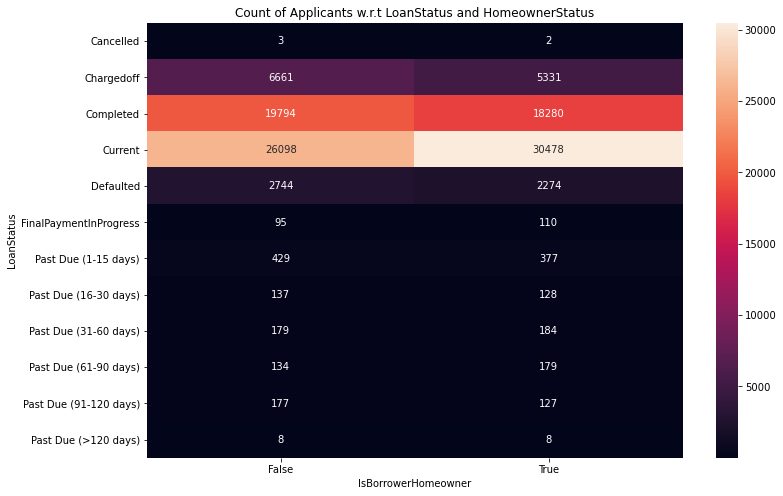

In [39]:
plt.figure(figsize = [12, 8])
ct_counts = df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus')

* We can clearly observe from below that , applicants who have their ownhomes have higher count on "Completed" and "Current" status. so bank should approve the loan fo people who own homes because there is good history that these people return the loan.

## Who is able to get loan easily if IncomeRange, Employment status,Prosperating_Alpha?

* For all the high rating categries like AA, A, B, C , it is quite evident from the graphs that the approval of loans are majorly depend on the applicants income range and Employment status.

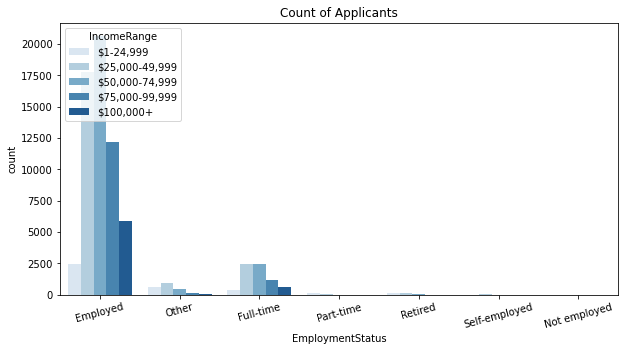

In [89]:
# since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [10, 5])

sb.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues');
ax.legend(loc = 0, ncol =2, framealpha = 1, title = 'IncomeRange');
plt.xticks(rotation = 15);
plt.title('Count of Applicants');



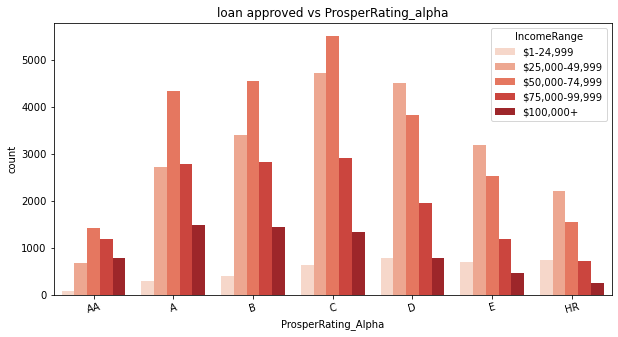

In [91]:
plt.figure(figsize = [10, 5])
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds');
ax.legend(loc =0,ncol = 2, framealpha =1, title = 'IncomeRange');
plt.title('loan approved vs ProsperRating_alpha');# re-arrange legend to reduce overlapping
plt.xticks(rotation = 15);


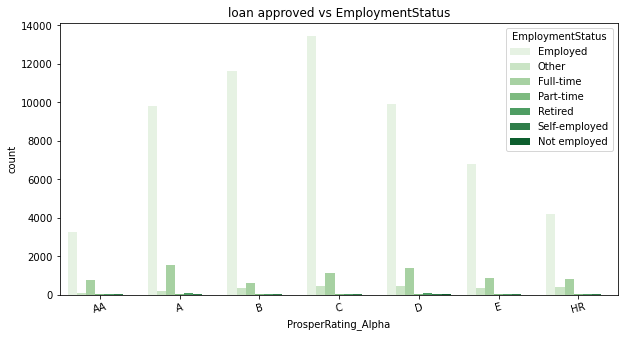

In [92]:
plt.figure(figsize = [10, 5])
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens');
ax.legend(loc = 1, ncol = 2,title = 'EmploymentStatus');
plt.title('loan approved vs EmploymentStatus');# re-arrange legend to remove overlapping
plt.xticks(rotation = 15);

**Conclusion**

it is evident from here that Employed people with income range in between 50000USD to 74999USD having rating C get the loan easily. 

## Can we predict  particular community's loan will be approved or not by looking their Monthly Salary of all the employees?

Here, Division in community is done on the basis of Prosper-rating_Alpha and Employment Status. 

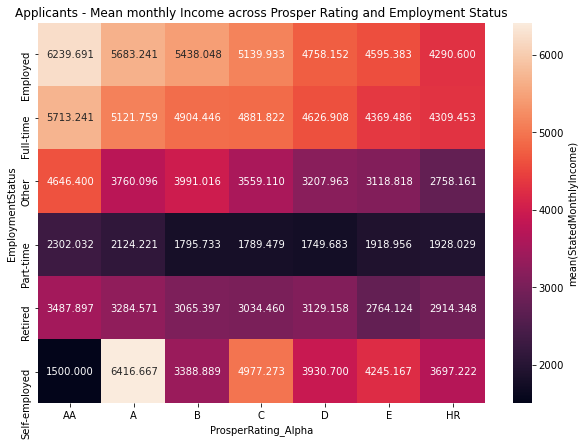

In [65]:

# To identify how the applicants mean monthly income is spread across
plt.figure(figsize = [10, 7])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_df_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');

**Conclusion**

* High rating is given to applicants with employee status having employed and full time and these appicants have higher monthly salary.
* People with Part-time Employment status do not easily get loan from the bank as there income is less then 24,999USD irrespective of their category.

## Wht is the affect on rating of a borrower on its Employment status and Monthly income

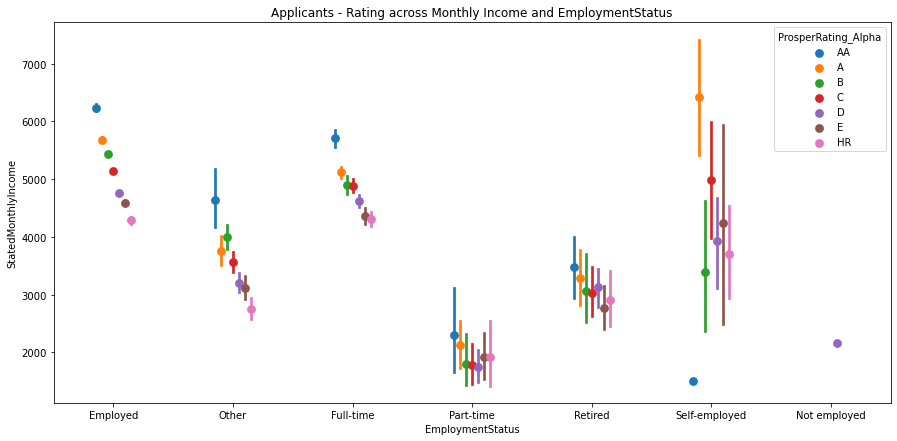

In [64]:
# To identify how the applicants rating is affected by Employment status and Monthly income
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = " ")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

**Conclusions**

It's clear yes Rating is dependent upon the income.

## is intrest rate on loan depends upon the rating ?



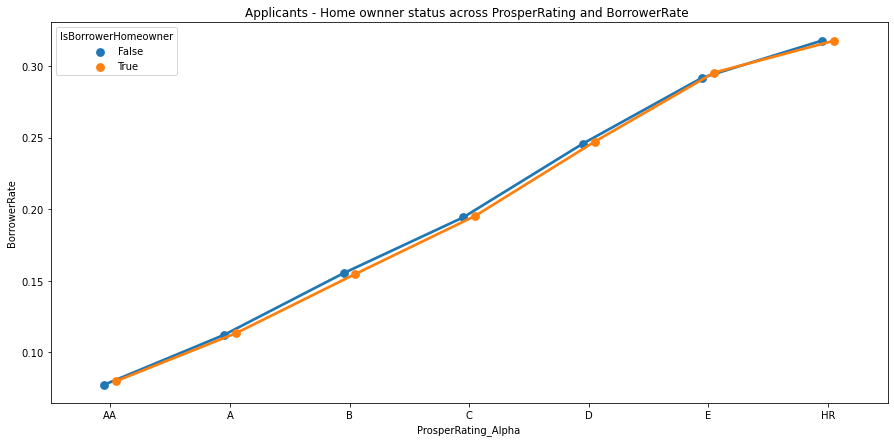

In [52]:
# To identify how the applicants interest rate is affected by ratings
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.1);
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

**Conclusion**

Yes Borrower with **HR** rating have higher intrest rate. i think this is the reason why people with HR rating do not prefer to take loan.

### Summary

* **BorrowerRate :**	*The Borrower's interest rate for this loan.* The borrowers rate follow an approximately unimodal distribution, with the peak around 0.16. There seems to be a spike that occurs around 0.32.
  
* **StatedMonthlyIncome :**	*The monthly income the borrower stated at the time the listing was created.*
 Monthly Income will definitely be right skewed since very few people will be having a higher salary. So I cut the outliers   and made the data to look at log 10 scales. Majority of the borrowers are having a salary with less than 10000 USD and the peak is observed at 5000 USD

* **LoanOriginalAmount:** The origination amount of the loan.Now this is interesting. Here we see that the distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD.

* **Investors:** Majority of the investors are between 0 and 100

* Loan original amount and monthly loan payment is highly correlated and it is expected  and borrowers interest rate and proper score are highly correlated(-vely).

* Majority of the borrowers with highest loan amount are taken by Employed, this is followed by others and fulltime employees

* The range of the salaries stated is higher for employed borrowers.

* LoanOriginalAmount is highest for A and B Prosper ratings, when compared with income range - 
  it is following a normal or expected trend that more salary borrowers are having higher loanoriginalamount 

* LoanStatus with current and completed have own homes when they applied for loans

* Majority of the loan applicants are from 50K to 75K range with emloyeed status

* Applicants with incomerange of 50K to 75K range have their prosper rating falling under AA, A, B and C 

* For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary

* Employed and full time employees have their mean salaries in higher range




* Majority of the borrowers are falling under prosper rating of B , irrespective of the income range

* The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating  of    AA, A and B

* We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However  homeowner tends to have lower interest rate and higher rating.  So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates.

* To conclude this analysis , I  must say that the loan approval status is heavily dependent on the applicant's information on IncomeRange, Homeownerstatus and employment status.


In [93]:
!jupyter nbconvert Explanatory_visualization_Slide_Deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Explanatory_visualization_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 874278 bytes to Explanatory_visualization_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Explanatory_visualization_Slide_Deck.slides.html
Use Control-C to stop this server
^C

Interrupted
